### 背景描述
当一个新用户进来时，系统不知道推荐什么，可以从用户看什么来进行相关性的推荐，比如靠近交通、景区等，又或者是含早餐、有电梯等特殊的，这里怎么基于不同酒店的相似度来进行推荐的。

#### 基于酒店的文本描述来推荐相似酒店

In [71]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import random
import cufflinks  # pip install cufflinks
import matplotlib.pyplot as plt
from plotly.offline import iplot
cufflinks.go_offline()

In [2]:
df = pd.read_csv("data/Seattle_Hotels.csv", encoding="latin-1")  # 西雅图酒店推荐数据
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


上面分别是酒店名字、地址及描述

In [3]:
df.shape

(152, 3)

In [4]:
df['desc'][0]  # 查看酒店描述的个例

"Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productive.

### 文本词频统计
统计下酒店介绍文本里大多数描述的信息有哪些

In [5]:
vec = CountVectorizer().fit(df['desc'])  # 寄存器
bag_of_words = vec.transform(df['desc'])  # 将文本转数值

In [6]:
bag_of_words.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [7]:
bag_of_words.shape  # 一共152含对应上面的数据，其中有3200个不同的词

(152, 3200)

In [8]:
sum_words = bag_of_words.sum(axis=0)  # 计算每个词重复的次数
sum_words

matrix([[ 1, 11, 11, ...,  2,  6,  2]], dtype=int64)

In [9]:
words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]  # 得到词及对应出现的次数
words_freq

[('located', 108),
 ('on', 129),
 ('the', 1258),
 ('southern', 1),
 ('tip', 1),
 ('of', 536),
 ('lake', 41),
 ('union', 33),
 ('hilton', 12),
 ('garden', 11),
 ('inn', 89),
 ('seattle', 533),
 ('downtown', 133),
 ('hotel', 295),
 ('is', 271),
 ('perfectly', 6),
 ('for', 216),
 ('business', 87),
 ('and', 1062),
 ('leisure', 18),
 ('neighborhood', 35),
 ('home', 57),
 ('to', 471),
 ('numerous', 1),
 ('major', 12),
 ('international', 32),
 ('companies', 6),
 ('including', 47),
 ('amazon', 19),
 ('google', 6),
 ('bill', 4),
 ('melinda', 4),
 ('gates', 5),
 ('foundation', 4),
 ('wealth', 1),
 ('eclectic', 8),
 ('restaurants', 35),
 ('bars', 7),
 ('make', 43),
 ('this', 63),
 ('area', 51),
 ('one', 75),
 ('most', 40),
 ('sought', 1),
 ('out', 23),
 ('by', 71),
 ('locals', 5),
 ('visitors', 4),
 ('our', 359),
 ('proximity', 8),
 ('allows', 3),
 ('take', 31),
 ('in', 449),
 ('some', 22),
 ('pacific', 42),
 ('northwest', 42),
 ('majestic', 4),
 ('scenery', 2),
 ('enjoy', 93),
 ('outdoor', 23),


In [10]:
words_freq = sorted(words_freq, key=lambda x:x[1],reverse=True)  # 排序重复的次数
words_freq

[('the', 1258),
 ('and', 1062),
 ('of', 536),
 ('seattle', 533),
 ('to', 471),
 ('in', 449),
 ('our', 359),
 ('you', 304),
 ('hotel', 295),
 ('with', 280),
 ('is', 271),
 ('at', 231),
 ('from', 224),
 ('for', 216),
 ('your', 186),
 ('or', 161),
 ('center', 151),
 ('are', 136),
 ('downtown', 133),
 ('on', 129),
 ('we', 128),
 ('free', 123),
 ('as', 117),
 ('located', 108),
 ('rooms', 106),
 ('stay', 105),
 ('place', 102),
 ('all', 100),
 ('airport', 99),
 ('space', 97),
 ('market', 97),
 ('enjoy', 93),
 ('an', 91),
 ('pike', 90),
 ('inn', 89),
 ('business', 87),
 ('just', 82),
 ('city', 79),
 ('room', 77),
 ('one', 75),
 ('by', 71),
 ('breakfast', 68),
 ('needle', 68),
 ('suites', 67),
 ('washington', 67),
 ('that', 65),
 ('re', 64),
 ('this', 63),
 ('complimentary', 62),
 ('also', 62),
 ('amenities', 60),
 ('offer', 59),
 ('attractions', 59),
 ('away', 59),
 ('access', 59),
 ('home', 57),
 ('guest', 57),
 ('can', 55),
 ('it', 55),
 ('guests', 54),
 ('service', 53),
 ('experience', 52),

这里重复最多的the我们并不是重要的信息词，后面我们需要进行怎样的优化呢

In [11]:
def get_top_n_words(corpus, n=None):
    # 获取某数据中最长出现的n个词
    vec = CountVectorizer().fit(corpus)  # 寄存器
    bag_of_words = vec.transform(corpus)  # 将文本转数值
    sum_words = bag_of_words.sum(axis=0)  # 计算每个词重复的次数
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]  # 得到词及对应出现的次数
    words_freq = sorted(words_freq, key=lambda x:x[1],reverse=True)  # 排序重复的次数
    return words_freq[:n]

In [12]:
common_words = get_top_n_words(df['desc'], 20)
common_words

[('the', 1258),
 ('and', 1062),
 ('of', 536),
 ('seattle', 533),
 ('to', 471),
 ('in', 449),
 ('our', 359),
 ('you', 304),
 ('hotel', 295),
 ('with', 280),
 ('is', 271),
 ('at', 231),
 ('from', 224),
 ('for', 216),
 ('your', 186),
 ('or', 161),
 ('center', 151),
 ('are', 136),
 ('downtown', 133),
 ('on', 129)]

In [13]:
df_common_words = pd.DataFrame(common_words, columns=['desc', 'count'])
df_common_words.head()

,desc,count
0,the,1258
1,and,1062
2,of,536
3,seattle,533
4,to,471


Text(0.5, 1.0, 'top 20')

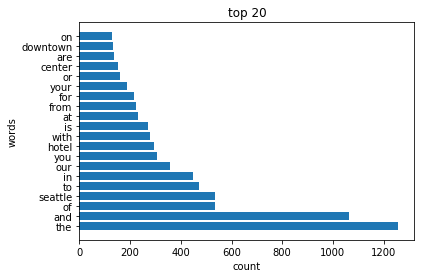

In [14]:
plt.barh(df_common_words['desc'], df_common_words['count'])
plt.xlabel('count')
plt.ylabel('words')
plt.title('top 20')

可以看到top20大多数是无关紧要的词

In [15]:
def get_top_n_words(corpus, n=None):
    # 获取某数据中最长出现的n个词，并增加停用词过滤
    vec = CountVectorizer(stop_words='english').fit(corpus)  # 增加停用词，即自动过滤掉某些字或词
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]  # 得到词及对应出现的次数
    words_freq = sorted(words_freq, key=lambda x:x[1],reverse=True)
    return words_freq[:n]

In [16]:
common_words = get_top_n_words(df['desc'], 20)
df_common_words = pd.DataFrame(common_words, columns=['desc', 'count'])
df_common_words.head()

,desc,count
0,seattle,533
1,hotel,295
2,center,151
3,downtown,133
4,free,123


Text(0.5, 1.0, 'top 20')

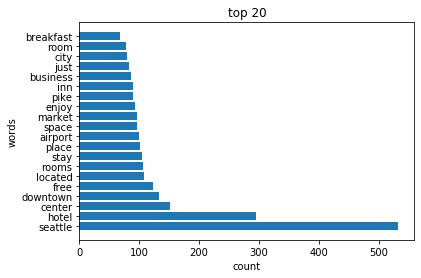

In [17]:
plt.barh(df_common_words['desc'], df_common_words['count'])
plt.xlabel('count')
plt.ylabel('words')
plt.title('top 20')

可以看到这次的top 20清晰了很多，如最多的seattle、hotle、center等，这里还是一个词一个词去分的，词组起来连贯后意思会不同，如在机场的便利店附近的酒店，这个酒店除了在便利店附近，还得是机场附近。

In [18]:
def get_top_n_words(corpus, n=None):
    # 获取某数据中最长出现的n个词，并增加停用词，增加连贯词
    vec = CountVectorizer(stop_words='english',ngram_range=(2,2)).fit(corpus)  # 增加两次词连贯的
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]  # 得到词及对应出现的次数
    words_freq = sorted(words_freq, key=lambda x:x[1],reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'top 20')

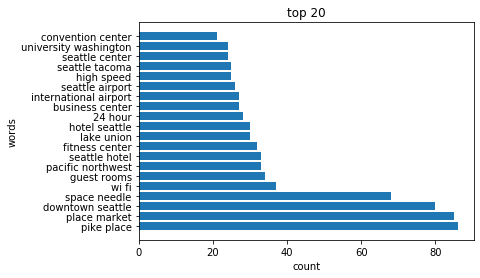

In [19]:
common_words = get_top_n_words(df['desc'], 20)
df_common_words = pd.DataFrame(common_words, columns=['desc', 'count'])
plt.barh(df_common_words['desc'], df_common_words['count'])
plt.xlabel('count')
plt.ylabel('words')
plt.title('top 20')

这样所有的词都连起来了，第一个词Pike Place是西雅图的一个广场、以及wifi等关键字眼。

### 文本清洗
描述的一些统计信息

In [20]:
df['word_count'] = df['desc'].apply(lambda x:len(str(x).split()))  # 计算每个描述的长度

In [21]:
df.head()

,name,address,desc,word_count
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,150
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151


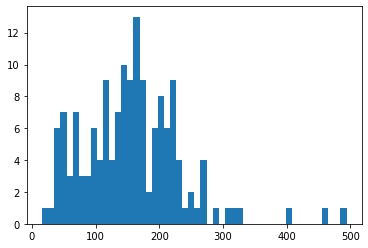

In [23]:
plt.hist(df['word_count'], bins=50)
plt.show()  # 绝大多数是250内的，不会是太长的

In [121]:
# 过滤掉不需要保留的
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words('english'))

In [132]:
def clean_txt(text):
    sub_replace = re.compile('[^0-9a-z]')  # 去掉非数值及英文的
    text = sub_replace.sub(' ', text)
    return text

In [149]:
df['desc_clean'] = df['desc'].str.lower()  # 全部转小写
df['desc_clean'] = df['desc_clean'].apply(clean_txt)
df['desc_clean'] = df['desc_clean'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in set_stopwords))
# df['desc_clean'] = df['desc_clean'].apply(clean_txt)
df.head()

,name,address,desc,word_count,desc_clean
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184,located southern tip lake union hilton garden...
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152,located city vibrant core sheraton grand seat...
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147,located heart downtown seattle award winning ...
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,150,near hotel downtown seattle location better ...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151,situated amid incredible shopping iconic attra...


In [150]:
df['desc'][0]

"Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productive.

In [151]:
df['desc_clean'][0]

'located southern tip lake union  hilton garden inn seattle downtown hotel perfectly located business leisure   neighborhood home numerous major international companies including amazon  google bill   melinda gates foundation  wealth eclectic restaurants bars make area seattle one sought locals visitors  proximity lake union allows visitors take pacific northwest majestic scenery enjoy outdoor activities like kayaking sailing  2 000 sq  ft  versatile space complimentary business center  state art v technology helpful staff guarantee conference  cocktail reception wedding success  refresh sparkling saltwater pool  energize latest equipment 24 hour fitness center  tastefully decorated flooded natural light  guest rooms suites offer everything need relax stay productive  unwind bar  enjoy american cuisine breakfast  lunch dinner restaurant  24 hour pavilion pantry  stocks variety snacks  drinks sundries '